#데이터 준비

In [ ]:
import pandas as pd
import numpy as np

fish = pd.read_csv("/content/drive/MyDrive/AIML_bum/fish_csv_data.csv")

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()
print(fish_input.shape,"\n",fish_target.shape)

(159, 5) 
 (159,)


In [ ]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
# 데이터 전처리
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [ ]:
print(train_input.shape,train_target.shape)

(119, 5) (119,)


In [ ]:
## 데이터 표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
print(train_scaled.shape,test_scaled.shape)

(119, 5) (40, 5)


In [ ]:
# 사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스 SDGClassifier
from sklearn.linear_model import SGDClassifier
print(train_target.shape)

(119,)


In [ ]:
sc = SGDClassifier(loss="log_loss",max_iter=100,random_state=42)

In [ ]:
sc.fit(train_scaled,train_target)

SGDClassifier(loss='log_loss', max_iter=100, random_state=42)

In [ ]:
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8403361344537815
0.8


In [ ]:
sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.907563025210084
0.925


# 에포크와 과대/과소 적합
##에포크는 학습데이터를 한번 다 쓰는 것을 말한다.

In [ ]:
## fit() method 말고 partial_fit() method를 사용해 점진적으로 학습한다.
## fit()을 사용하지 않고 partial_fit을 사용하면 모델 내의 타겟 클래스가 없어서 문제가 생긴다.
## class를 전달해줘야한다.

sc_epoch =SGDClassifier(loss="log_loss", random_state = 42)

train_score = []
test_score = []

classes = np.unique(train_target)


In [ ]:
for epoch in range(0,300):
  sc_epoch.partial_fit(train_scaled,train_target,classes=classes) # partial_fit max_iter = 1,, epoch = 1

  train_score.append(sc_epoch.score(train_scaled,train_target))
  test_score.append(sc_epoch.score(test_scaled,test_target))

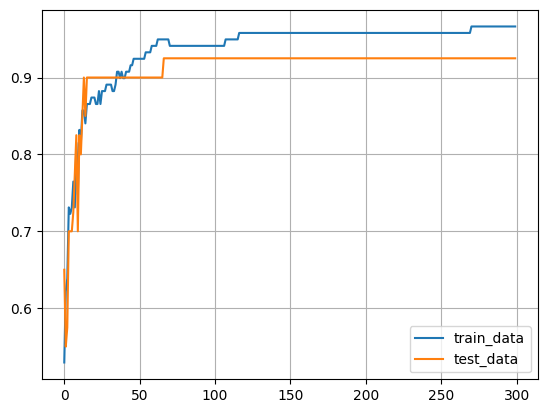

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score,label="train_data")
plt.plot(test_score,label="test_data")

plt.legend()
plt.grid()
plt.show()

In [ ]:
## 100번 에포크에 맞추고 모델 훈련 최종적으로 훈련세트와 테스트세트 점수를 출력
## tol 매개변수를 None으로 지정하여 자동을 멈추지 않고 100만큼 무조건 반복

sc_100 = SGDClassifier(loss="log_loss",max_iter=100,tol=None,random_state=42) # 들어온 DATA에 따라 이진 크로스 엔트로피 (스파스) 다중크로스엔트로피 중 하나가 선택되고 이에 맞게 활성화 함수도 선택된다.
sc_100.fit(train_scaled,train_target)

print(sc_100.score(train_scaled,train_target))
print(sc_100.score(test_scaled,test_target))

0.957983193277311
0.925
